In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from reproject.healpix import reproject_to_healpix

import os

from astropy.io import fits


# Julia/xgpaint results

In [2]:
def map_SZ(fname, title = "kSZ map TOTAL (NSIDE=2048)", unit = r"ΔT, $(\mu K)$", cmap = "plasma", scale = 1):
    # The tSZ Compton-y map (field 0)
    y_map = hp.read_map(fname, field=0, nest=False, dtype=np.float32)
    
    # Plot it directly
    hp.mollview(y_map*scale, title=title, unit=unit, norm="hist", cmap = cmap, format="%.1e")
    hp.graticule()
    plt.show()
    return y_map

In [3]:
def power_spectra_computation(fname):
    data_full = hp.read_map(fname, field=0, nest=False, dtype=np.float32)

    lmax = 3*hp.get_nside(data_full) - 1
    cl = hp.anafast(data_full, lmax=lmax)
    ell = np.arange(len(cl))
    Dl = ell*(ell+1)*cl/(2*np.pi)
    return Dl, ell

In [4]:
def plot_power_spectra(y_map, title = "Power spectrum of total kSZ map"):
    lmax = 3*hp.get_nside(y_map) - 1
    cl = hp.anafast(y_map, lmax=lmax)
    ell = np.arange(len(cl))

    Dl = ell*(ell+1)*cl/(2*np.pi)*10**12
    #Dl = cl/(2*np.pi)*10**12
    plt.loglog(ell, Dl*10**6)
    plt.xlabel(r"$\ell$"); plt.ylabel(r"$\ell(\ell+1)C_\ell/2\pi, (\mu K^2)$")
    plt.xlim((70, 6000))
    plt.title(title)
    plt.show()
    return Dl

# WEB-sky comparison

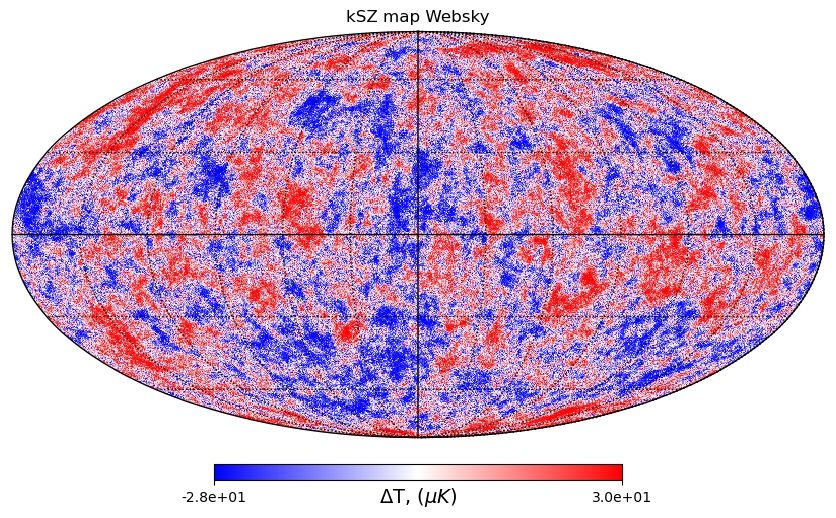

In [5]:

fname = "ksz_websky.fits"
websky_full = map_SZ(fname, title  = r"kSZ map Websky", unit = r"ΔT, $(\mu K)$", cmap = "bwr")

In [44]:
fname = "ksz_websky.fits"
Dl1, ell1 = power_spectra_computation(fname)

In [52]:
fname18= "batched_data/websky_kSZ_nside4096_sigmoid_13Msol_cutoff_HALO_m200c_BATCHED.fits"
Dl18, ell18 = power_spectra_computation(fname18)

In [36]:
# the comoving units with /(1+z) for veolocities

cl = hp.read_cl("batched_data/websky_kSZ_cl_mass_change_xgpaint_h4_removed.fits")[1]  # 1D array
ells_ph = np.array(range(len(cl)))
Dl_ph = ells_ph*(ells_ph+1)*cl/(2*np.pi)

nan

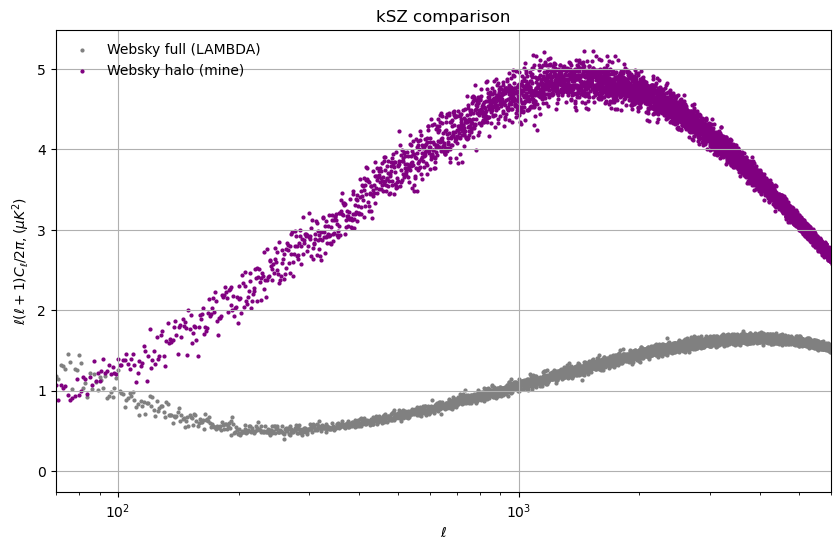

In [56]:
plt.figure(figsize = (10, 6))
factor_mult = (2.7255*1e6)**2
CMB_factor = 1/(2.73**2)
plt.title("kSZ comparison")

plt.scatter(ell1, Dl1, s = 4, label = "Websky full (LAMBDA)", c= 'grey')
plt.scatter(ell18, Dl18*factor_mult, s = 4, label = "Websky halo (mine)", c = "purple")
# plt.scatter(ells_ph, Dl_ph*factor_mult, s = 4, label = "Websky physical", c = "blue")


plt.xlabel(r"$\ell$"); plt.ylabel(r"$\ell(\ell+1)C_\ell/2\pi, (\mu K^2)$")
plt.xlim((70, 6000))
# plt.ylim((0.1, 2.5))
plt.xscale("log")
# plt.title(title)
plt.legend(frameon = False)
plt.grid()
plt.savefig("Websky_kSZ_comparison.png")
plt.show()

# tSZ tests

In [5]:
fname3 = "tsz.fits"
Dl3, ell3 = power_spectra_computation(fname3)

In [6]:
cl_soc = hp.read_cl("batched_data/websky_tSZ_cl_m200c_default_sett_SOConverter.fits")[1]  # 1D array
ells_soc = np.array(range(len(cl_soc)))
Dl_soc = ells_soc*(ells_soc+1)*cl_soc/(2*np.pi)

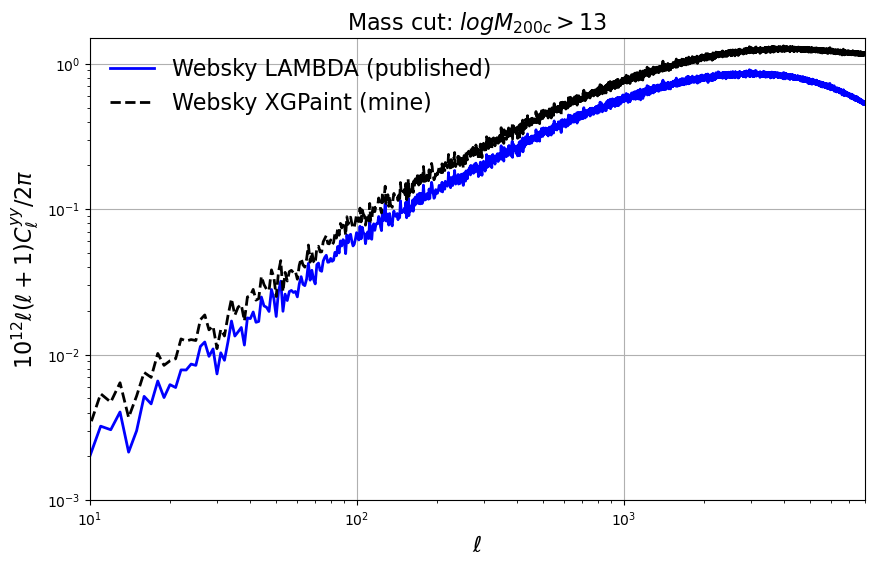

In [29]:
plt.figure(figsize = (10, 6))


# plt.plot(ell_tsz, Dl_tsz*10**12, linewidth = 2, label = "HalfDome", c= 'purple')
# plt.plot(ell_tsz2, Dl_tsz2*10**12, "--", linewidth = 2, label = "Websky XGPaint", c= 'blue')
# plt.plot(ell4, Dl4*10**12, linewidth = 2, label = "Websky no mass corr", c= 'green')
plt.plot(ell3, Dl3*10**12, linewidth = 2, label = "Websky LAMBDA (published)", c= 'blue')
# plt.plot(ell5, Dl5*10**12, "--", linewidth = 2, label = "Websky M*h", c= 'red')
# plt.plot(ells_ph, Dl_ph*10**12, "--", linewidth = 2, label = "Websky mine", c= 'orange')
plt.plot(ells_soc, Dl_soc*10**12, "--", linewidth = 2, label = "Websky XGPaint (mine)", c= 'black')


plt.xlabel(r"$\ell$", fontsize= 16); plt.ylabel(r"$10^{12} \ell(\ell+1)C^{yy}_\ell/2\pi $", fontsize = 16)
plt.xlim((10, 8000))
plt.ylim((1e-3, 1.5))
plt.xscale("log")
plt.yscale("log")
# plt.title(title)
plt.legend(frameon = False, fontsize = 16)
plt.grid()
plt.title("Mass cut: $logM_{200c} > 13$", fontsize =16)
# plt.savefig("plots\tSZ_HalfDome_vs_Websky.png")
plt.show()

/tmp/ipykernel_51/2869118107.py:26: RuntimeWarning: invalid value encountered in divide
  ratio = Dl_soc / Dl3
/tmp/ipykernel_51/2869118107.py:28: RuntimeWarning: invalid value encountered in divide
  pct = ((Dl_soc - Dl3) / Dl3)


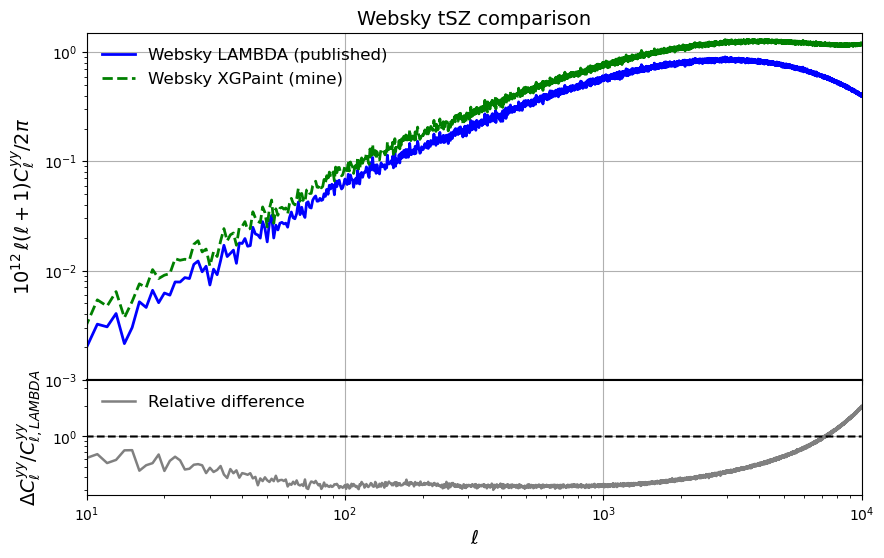

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(10, 6), sharex=True,
    gridspec_kw={"height_ratios": [3, 1], "hspace": 0.0}
)

# -------------------
# Top panel: spectra
# -------------------
ax1.plot(ell3, Dl3*1e12, lw=2, label="Websky LAMBDA (published)", c="blue")
ax1.plot(ells_soc, Dl_soc*1e12, ls="--", lw=2, label="Websky XGPaint (mine)", c="green")

ax1.set_ylabel(r"$10^{12}\,\ell(\ell+1)C^{yy}_\ell/2\pi$", fontsize=14)
ax1.set_yscale("log")
ax1.set_ylim(1e-3, 1.5)
ax1.grid(True)
ax1.legend(frameon=False, fontsize=12)
ax1.set_title(r"Websky tSZ comparison", fontsize=14)

# -------------------
# Bottom panel: ratio-like (around 1), like your example image
# -------------------
# If ell-grids differ, you should interpolate Dl_soc onto ell3 before doing this.
ratio = Dl_soc / Dl3

pct = ((Dl_soc - Dl3) / Dl3)
ax2.plot(ell3, pct, lw=1.8, c="grey", label="Relative difference")
ax2.plot(ell3, np.ones(len(ell3)), "--", c = "black")
ax2.set_ylabel("% diff", fontsize=14)
# (then choose a sensible y-lim for your data)


ax2.set_ylabel(r"$\Delta C^{yy}_\ell / C^{yy}_{\ell, LAMBDA}$", fontsize=14)
ax2.set_xlabel(r"$\ell$", fontsize=14)
ax2.set_yscale("log")
# ax2.set_ylim(0.9, 1.1)  # tweak to taste
ax2.grid(True)
ax2.legend(frameon=False, fontsize=12)

# Shared x formatting
ax2.set_xscale("log")
ax2.set_xlim(10, 10000)

# Make the divider line look like the example
ax1.spines["bottom"].set_linewidth(1.5)
ax2.spines["top"].set_linewidth(1.5)
ax1.tick_params(labelbottom=False)  # hide top x tick labels
plt.savefig("plots\tSZ_Websky_comparison_with.png")
plt.show()
